In [1]:
%matplotlib inline

In [9]:
import i3assist as i3
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# The GridSearch class holds a list of Euler objects
# describing the local orientations searched in eulerFG*
# scripts and by the MRASRCH parameter
# gs - grid search
gs = i3.GridSearch(theta_max=9., theta_step=3., psi_max=6., psi_step=3., do_180=False)
len(gs) # Let's you know how many angles you will be searching using these parameters.

110

In [5]:
# The GridSearch can be iterated over to see the individual euler angles.
# Each of these can be manipulated; the individual components can be gotten;
# and the rotations can be inverted and converted to the rotation matrix 
gs = i3.GridSearch(2., 1., 2., 1.) #Short hand version of above: tMax, tStep, pMax, pStep
for euler in gs:
    print("Phi: {:f}".format(euler.phi), end=' ') # Get First Euler Angle
    print("Theta: {:f}".format(euler.theta), end=' ') # Get Second Euler Angle
    print("Psi: {:f}".format(euler.psi)) # Get Third Euler Angle
    print("Another way to print it: {:s}".format(str(euler))) # Euler objects pretty print by default
    euler.normalize() # Makes Phi and Psi in the range [-180, 180], and theta in the range [0, 180] for old I3
    print("Normalized inverse: ", euler)
    invEuler = euler.copy() # All modifications to objects happen inplace so make copies
    invEuler.invert() # Inverts the rotations
    print("Inverse rotation: ", invEuler)
    rotMat = euler.to_matrix() # Convert ZXZ euler angles to ZXZ rotation matrix
    print("Rotation matrix: ", rotMat) # prints in a line like new I3 trf format
    print(""*80, end='\n\n')

Phi: 0.000000 Theta: 0.000000 Psi: 0.000000
Another way to print it:  0.000000  0.000000  0.000000
Normalized inverse:   0.000000  0.000000  0.000000
Inverse rotation:   0.000000  0.000000  0.000000
Rotation matrix:   1.000000  0.000000  0.000000 -0.000000  1.000000  0.000000  0.000000 -0.000000  1.000000


Phi: 0.000000 Theta: 0.000000 Psi: 1.000000
Another way to print it:  0.000000  0.000000  1.000000
Normalized inverse:   0.000000  0.000000  1.000000
Inverse rotation:   0.000000  0.000000  1.000000
Rotation matrix:   0.999848  0.017452  0.000000 -0.017452  0.999848  0.000000  0.000000 -0.000000  1.000000


Phi: 0.000000 Theta: 0.000000 Psi: -1.000000
Another way to print it:  0.000000  0.000000 -1.000000
Normalized inverse:   0.000000  0.000000 -1.000000
Inverse rotation:   0.000000  0.000000 -1.000000
Rotation matrix:   0.999848 -0.017452 -0.000000  0.017452  0.999848  0.000000  0.000000 -0.000000  1.000000


Phi: 0.000000 Theta: 0.000000 Psi: 2.000000
Another way to print it:  0.

NameError: name 'np' is not defined

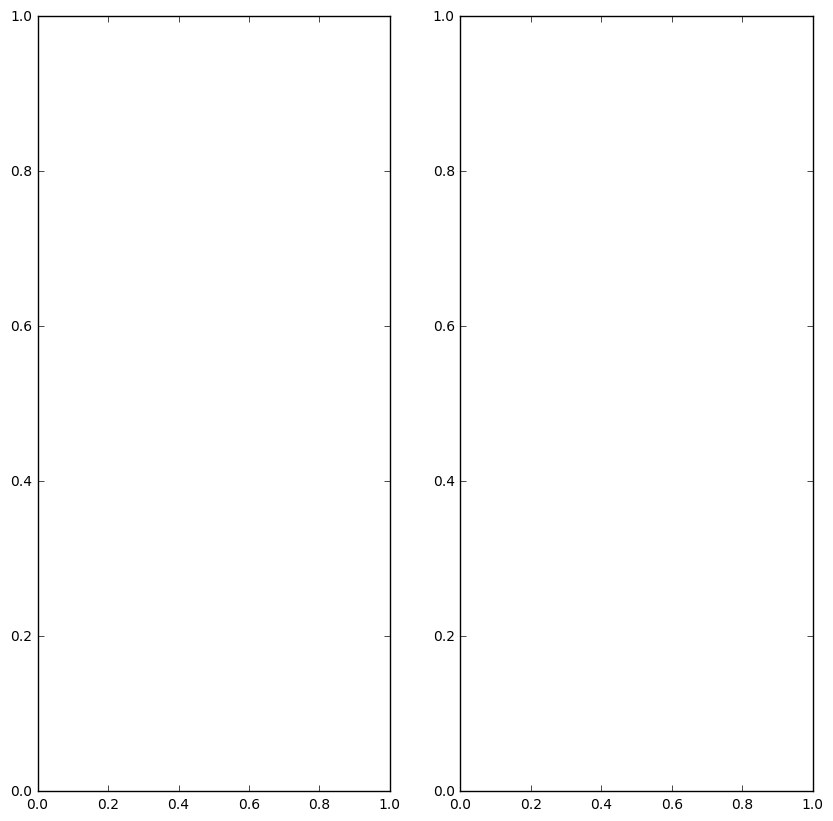

In [8]:
gs = i3.GridSearch(9., 3., 30., 1.0)
lons = []
lats = []
for i in gs:
    if len(lons) == 0:
        lons.append(i.phi)
        lats.append(90. - i.theta)
    elif lons[-1] != i.phi or lats[-1] != 90. - i.theta:
        lons.append(i.phi)
        lats.append(90. - i.theta)
    else:
        pass
f, (sp1, sp2) = plt.subplots(1, 2, figsize=(10,10))
m1 = Basemap(projection='nplaea', boundinglat=80, lon_0=0.,resolution='l', ax=sp1)
m2 = Basemap(projection='splaea', boundinglat=-1, lon_0=270., resolution='l', ax=sp2)
m1.drawparallels(np.arange(80.,90.,0.5), labels=[1,0,0,0])
m1.drawmeridians(np.arange(-180.,181.,15.), labels=[0,1,1,0])
m2.drawparallels(np.arange(-60.,90.,15.), labels=[0,1,0,0])
m2.drawmeridians(np.arange(-180.,181.,15.))
x1, y1 = m1(lons, lats)
m1.scatter(x1,y1,marker='o',color='r')
x2, y2 = m2(lons, lats)
m2.scatter(x2, y2, marker='D', color='g')
plt.show()

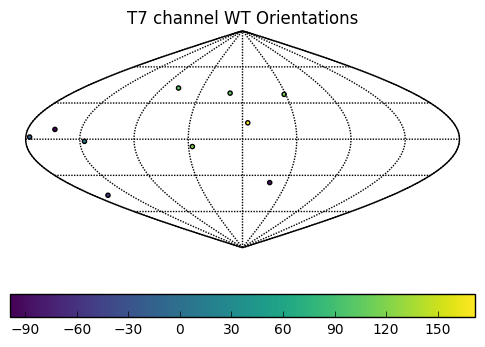

In [111]:
tl = i3.TransformList()
tl.fromFile('test.trf')
lons = []
lats = []
clrs = []
for trf in tl[:10]:
    rot = trf.rotation
    eul = rot.getEuler()
    lons.append(eul.phi)
    lats.append(90. - eul.theta)
    clrs.append(eul.psi)
m = Basemap(projection='sinu', lon_0=0., resolution='l')
m.drawparallels(np.arange(-90., 90., 30.))
m.drawmeridians(np.arange(-180., 181., 45.))
x, y = m(lons, lats)
cax = m.scatter(x, y, s=36, alpha=1., marker='.', c=clrs, cmap=plt.get_cmap('viridis'))
plt.colorbar(cax, orientation='horizontal')
plt.title('T7 channel WT Orientations')
plt.show()